In [1]:
import matplotlib.pyplot as plt
import numpy as np
import discopy.util as util
import discopy.plot as plot
import discopy.geom as geom
from pathlib import Path

In [2]:
checkpoint_root = Path('/Users/chelseasu/Documents/Disco/')
plot_dir = '/Users/chelseasu/Documents/disco_plots/'

In [3]:
def make_plots_rho(checkpoint, fig_name):
    t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint)
    rho = prim[:,0]
    p = prim[:,1]
    vr = prim[:,2]
    om = prim[:,3]
    vz = prim[:,4]
    fig, ax = plt.subplots(1, 1)
    ax.plot(r, rho)
    ax.set_ylim(0, 12)
    ax.set_ylabel('rho')
    fig.savefig(plot_dir + fig_name)
    plt.close(fig) #delete figure from memory
    return

In [4]:
for i in range(80):
    label = '{0:04d}'.format(i)
    checkpoint_name = 'checkpoint_' + label + '.h5'
    fig_name = 'rho_' + label + '.png'
    make_plots_rho(checkpoint_root/ checkpoint_name, fig_name)


In [35]:
def make_plots_c_s(checkpoint, fig_name):
    t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint)
    pars = util.loadPars(checkpoint_root/ checkpoint_name)
    gamma = pars['Adiabatic_Index']
  
    rho = prim[:,0]
    p = prim[:,1]
    vr = prim[:,2]
    om = prim[:,3]
    vz = prim[:,4]
    c_s = np.sqrt(gamma*p/rho)
    fig, ax = plt.subplots(1, 1)
    ax.plot(r, c_s)
    ax.set_ylim(0, 0.5)
    ax.set_ylabel('c_s')
    fig.savefig(plot_dir + fig_name)
    plt.close(fig) #delete figure from memory
    return

In [36]:
for i in range(0, 80):
    label = '{0:04d}'.format(i)
    checkpoint_name = 'checkpoint_' + label + '.h5'
    fig_name = 'c_s_' + label + '.png'
    make_plots_c_s(checkpoint_root/ checkpoint_name, fig_name)


In [37]:
def make_plots_sigma_avg(checkpoint, fig_name):
    t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint)
    opts = util.loadOpts(checkpoint)
    pars = util.loadPars(checkpoint)
    rho = prim[:,0]
    p = prim[:,1]
    vr = prim[:,2]
    om = prim[:,3]
    vz = prim[:,4]
    R = np.unique(r)

    sigma_average = geom.integrate2(rho, dat, opts, pars) / (2 * np.pi)
    m_dot = - geom.integrate2(r * rho * vr, dat, opts, pars) 

    fig, ax = plt.subplots(2, 1)
    ax[0].plot(R, sigma_average)
    ax[1].plot(R, m_dot)
    ax[1].set_ylim([-1, 1])
    ax[0].set_ylabel(r'$\langle \Sigma \rangle$')
    ax[1].set_ylabel(r'$\dot{M}$')
    fig.savefig(plot_dir + fig_name)
    plt.close(fig) #delete figure from memory
    return

In [38]:
for i in range(0, 80):
    label = '{0:04d}'.format(i)
    checkpoint_name = 'checkpoint_' + label + '.h5'
    fig_name = 'sigma_mdot' + label + '.png'
    make_plots_sigma_avg(checkpoint_root/ checkpoint_name, fig_name)


In [39]:
def make_plots_Hr(checkpoint, fig_name):
    t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint)
    rho = prim[:,0]
    p = prim[:,1]
    vr = prim[:,2]
    om = prim[:,3]
    vz = prim[:,4]
    R = np.unique(r)
    pars = util.loadPars(checkpoint_root/ checkpoint_name)
    gamma = pars['Adiabatic_Index']
    c_s = np.sqrt(gamma*p/rho)
    H = c_s / om
    Hr = H / r

    fig, ax = plt.subplots(1, 1)
    ax.plot(r, Hr)
    ax.set_ylabel(r'$H/r$')
    ax.set_ylim([0, 0.7])
    fig.savefig(plot_dir + fig_name)
    plt.close(fig) #delete figure from memory
    return

In [40]:
for i in range(0, 80):
    label = '{0:04d}'.format(i)
    checkpoint_name = 'checkpoint_' + label + '.h5'
    fig_name = 'Hr_' + label + '.png'
    make_plots_Hr(checkpoint_root/ checkpoint_name, fig_name)


In [23]:
checkpoint = '/Users/chelseasu/Documents/Disco/checkpoint_0005.h5'
t, r, phi, z, prim, dat = util.loadCheckpoint(checkpoint)
rho = prim[:,0]
p = prim[:,1]
vr = prim[:,2]
om = prim[:,3]
vz = prim[:,4]
R = np.unique(r)
pars = util.loadPars(checkpoint)
gamma = pars['Adiabatic_Index']
c_s = np.sqrt(gamma*p/rho)
H = c_s / om
Hr = H / r

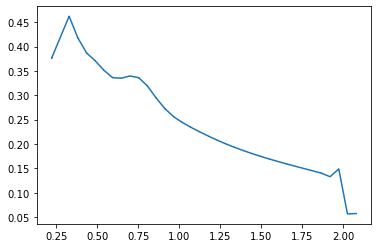

In [24]:
fig, ax = plt.subplots(1, 1)
ax.plot(r, Hr)

In [22]:
r.shape

(4992,)

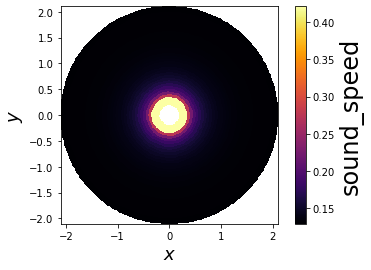

In [48]:
fig, ax = plt.subplots(1, 1)
plot.plotZSlice(fig, ax, rjph, piph, r, c_s, z, 'sound_speed', pars, opts)
fig.savefig('sound_speed.png')


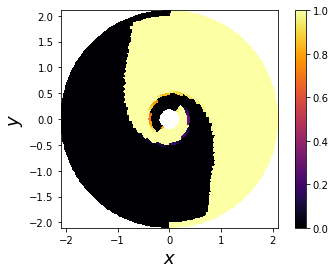

In [51]:
fig, ax = plt.subplots(1, 1)
plot.plotZSlice(fig, ax, rjph, piph, r, scalar, z, '', pars, opts)
# fig.savefig('sound_speed.png')

In [ ]:
# Plot accretion rate as a function of r for all checkpoints
# Plot solutions from disco primer